In [ ]:
import Pkg
Pkg.clone("https://github.com/visuddhi/UnivariateDensityEstimate.jl")

In [19]:
using UnivariateDensityEstimate, Statistics, Plots

In [20]:
using DelimitedFiles

In [21]:
Y1 = readdlm("data/tweet_data.txt",',');
Y1 = log.(Y1[:,2])
Y1 = Y1[Y1.>6]
Y1 = sort(vec(Y1));
a = Float64(minimum(Y1)-Statistics.std(Y1)/length(Y1)^0.5)
b = Float64(maximum(Y1)+Statistics.std(Y1)/length(Y1)^0.5)

13.31994958168822

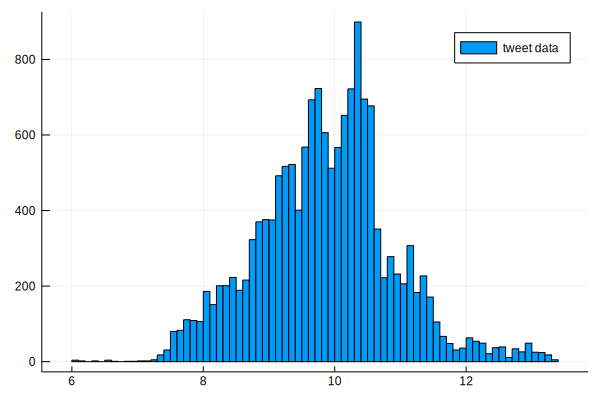

In [33]:
histogram(Y1, label = "tweet data")

In [35]:
savefig("fig/tweet_histogram")

In [29]:
# BernsteinEstimate_MD() estimates the PDF via the first-order method, recommened when no combinatorial constraints are imposed
# BernsteinEstimate_MIQO() estimates the PDF via the first-order method, recommened when combinatorial constraints are imposed
# BernsteinEstimate_MD(Y,m,a,b,k,e,T,MaxIter,obj,flag,Reg): Y -> data, m -> number of Bernstein basis, [a,b] -> range, k -> # of modes, so far only k =0,1 supported, Reg -> coefficient of the regularizer, T -> maximum seconds for computatation, MaxIter -> maximum # of iterations, e -> tolerance of error
# BernsteinEstimate_MIQO(Y,m,a,b,k,e,TimeLimit): Y -> data, m -> number of Bernstein basis, [a,b] -> range, k -> # of modes, e -> MIP gap (tolerance of error), TimeLimit -> maximum seconds for computatation
m = 250  
sol_MD_0, obj_MD_0 = BernsteinEstimate_MD(Y1,m,a,b,0,-1,10e10,15000,"Log","Acc",0);
sol_MIQO_0 = BernsteinEstimate_MIQO(Y1,m,a,b,0,0,500);
sol_MIQO_1 = BernsteinEstimate_MIQO(Y1,m,a,b,1,0,500);
sol_MIQO_2 = BernsteinEstimate_MIQO(Y1,m,a,b,2,0,500);
sol_MIQO_3 = BernsteinEstimate_MIQO(Y1,m,a,b,3,0,500);

D = 1000

val_MD_0 = vec(zeros(D,1))
val_MIQO_0 = vec(zeros(D,1))
val_MIQO_1 = vec(zeros(D,1))
val_MIQO_2 = vec(zeros(D,1))
val_MIQO_3 = vec(zeros(D,1))
x = range(a,stop = b, length = D)
for i = 1:D
    for j = 1:m
        val_MD_0[i] = val_MD_0[i]+sol_MD_0[j]*betapdf(j, m-j+1, (x[i]-a)/(b-a))/(b-a);
        val_MIQO_0[i] = val_MIQO_0[i]+sol_MIQO_0[j]*betapdf(j, m-j+1, (x[i]-a)/(b-a))/(b-a);
        val_MIQO_1[i] = val_MIQO_1[i]+sol_MIQO_1[j]*betapdf(j, m-j+1, (x[i]-a)/(b-a))/(b-a);
        val_MIQO_2[i] = val_MIQO_2[i]+sol_MIQO_2[j]*betapdf(j, m-j+1, (x[i]-a)/(b-a))/(b-a);
        val_MIQO_3[i] = val_MIQO_3[i]+sol_MIQO_3[j]*betapdf(j, m-j+1, (x[i]-a)/(b-a))/(b-a);
    end
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 1 rows, 1491 columns and 250 nonzeros
Model has 31375 quadratic objective terms
Variable types: 250 continuous, 1241 integer (1241 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+05, 4e+05]
  QObjective range [8e+04, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -56332.81894
Presolve removed 0 rows and 1241 columns
Presolve time: 0.01s
Presolved: 1 rows, 250 columns, 250 nonzeros
Presolved model has 31375 quadratic objective terms
Variable types: 250 continuous, 0 integer (0 binary)
Presolve time: 0.01s
Presolved: 1 rows, 250 columns, 250 nonzeros
Presolved model has 31375 quadratic objective terms
Root barrier log...

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 249
 AA' NZ     : 3.113e+04
 Factor NZ  : 3.138e+04 (roughly 1 MByte of memory)
 Factor Ops : 5

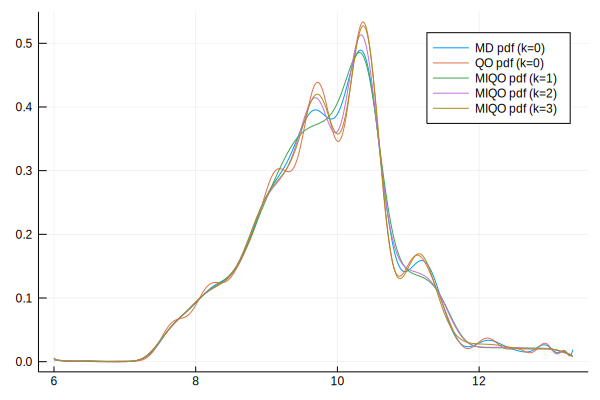

In [36]:
plot(x,val_MD_0,label="MD pdf (k=0)")
plot!(x,val_MIQO_0,label="QO pdf (k=0)")
plot!(x,val_MIQO_1,label="MIQO pdf (k=1)")
plot!(x,val_MIQO_2,label="MIQO pdf (k=2)")
plot!(x,val_MIQO_3,label="MIQO pdf (k=3)")

In [38]:
savefig("fig/tweet_pdf_estimated")